<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 1: HOTEL CUSTOMER SEGMENTATION </h1> </center> <br>
<center> <h2> Group G </h2> </center> <br>
<center> Business Cases for Data Science </center>
<center> 2022/2023 </center>

**Table of Contents** <br>
* [Setup](#setup)
    * [Import Libraries and Definitions](#importlibraries)
    * [Import Data](#importdata)
* [3. Continuation of Data Preparation](#continuation) 
    * [3.9. Feature Scaling](#scaling)
        * [3.9.1. MinMax Scaler](#minmax)
        * [3.9.2. Standard Scaler](#standard)
        * [3.9.3. Robust Scaler](#robust)
    * [3.10. PCA](#pca) 
* [4. Modeling](#modeling) 
    * [4.1. K-means](#kmeans)
    * [4.2. K-means and Hierarchical Clustering](#hckmeans)

<hr>
<a class="anchor" id="setup">
    
# Setup
    
</a>

<a class="anchor" id="importlibraries">

## Import Libraries and Initial Definitions

</a>

In [1]:
import pandas as pd
import numpy as np
import pycountry_convert as pc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline

subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

metric_features=['RoomNights']
non_metric_features=['SRHighFloor','SRCrib','SRKingSizeBed','SRTwinBed','SRQuietRoom','DEU','ESP','FRA','GBR','PRT',
'Direct','GDSSystems','TravelAgent/Operator','Age 30-39','Age 40-49','Age 50-59','Age<20','Age>=60','TotalRevenue>Q3', 
'TotalRevenue Q1-Q2','TotalRevenue Q2-Q3','DaysSinceCreation 1-2','DaysSinceCreation 2-3','DaysSinceCreation 3+',
'AverageLeadTime 6+','AverageLeadTime 3-6','BookingsCheckedIn 2-6','BookingsCheckedIn 6+','BookingsCanceled 1-3',
'BookingsCanceled 3+','BookingsNoShowed 1','BookingsNoShowed 1+']

<a class="anchor" id="importlibraries">

## Import Data

</a>

In [2]:
data_imp=pd.read_csv('data_new.csv').set_index('ID')
data_imp.head()

,PersonsNights,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,DEU,ESP,FRA,...,AverageLeadTime 6+,BookingsCheckedIn 2-6,BookingsCheckedIn 6+,BookingsCanceled 1-3,BookingsCanceled 3+,BookingsNoShowed 1,BookingsNoShowed 1+,TotalRevenue>Q3,TotalRevenue Q1-Q2,TotalRevenue Q2-Q3
ID,,,,,,,,,,,,,,,,,,,,,
1,6.0,4.0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10.0,5.0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,4.0,2.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.0,5.0,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,6.0,3.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<hr>
<a class="anchor" id="continuation">
    
# 3. Continuation of Data Preparation
    
</a>

<a class="anchor" id="scaling">
    
## 3.9. Feature Scaling
    
    
</a>

<a class="anchor" id="minmax">

#### 3.9.1. MinMaxScaler

</a>

In [3]:
# Get a copy of the dataframe before normalization for results' analysis
data_minmax = data_imp.copy()

In [4]:
scaler=MinMaxScaler() #scaling the data
scaled_feat=scaler.fit_transform(data_minmax[metric_features])
data_minmax.loc[:,metric_features]=scaled_feat
data_minmax

,PersonsNights,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,DEU,ESP,FRA,...,AverageLeadTime 6+,BookingsCheckedIn 2-6,BookingsCheckedIn 6+,BookingsCanceled 1-3,BookingsCanceled 3+,BookingsNoShowed 1,BookingsNoShowed 1+,TotalRevenue>Q3,TotalRevenue Q1-Q2,TotalRevenue Q2-Q3
ID,,,,,,,,,,,,,,,,,,,,,
1,6.0,0.008021,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10.0,0.010695,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,4.0,0.002674,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.0,0.010695,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,6.0,0.005348,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47913,5.0,0.010695,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14964,9.0,0.013369,0,0,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2037,5.0,0.008021,0,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# Check dataframe structure and statistics after all transformations
print(data_minmax.shape)
data_minmax.describe(include='all').T

(72476, 41)


,count,mean,std,min,25%,50%,75%,max
PersonsNights,72476.0,6.478669,4.888601,1.0,4.000000,6.000000,8.000000,377.0
RoomNights,72476.0,0.006115,0.007348,0.0,0.002674,0.005348,0.008021,1.0
SRHighFloor,72476.0,0.041545,0.199548,0.0,0.000000,0.000000,0.000000,1.0
SRCrib,72476.0,0.010541,0.102130,0.0,0.000000,0.000000,0.000000,1.0
SRKingSizeBed,72476.0,0.353579,0.478084,0.0,0.000000,0.000000,1.000000,1.0
SRTwinBed,72476.0,0.148739,0.355833,0.0,0.000000,0.000000,0.000000,1.0
SRQuietRoom,72476.0,0.087312,0.282293,0.0,0.000000,0.000000,0.000000,1.0
DEU,72476.0,0.141150,0.348179,0.0,0.000000,0.000000,0.000000,1.0
ESP,72476.0,0.060034,0.237551,0.0,0.000000,0.000000,0.000000,1.0
FRA,72476.0,0.155100,0.362002,0.0,0.000000,0.000000,0.000000,1.0


<a class="anchor" id="standard">

#### 3.9.2. Standard Scaler

</a>

In [6]:
# Get a copy of the dataframe before normalization for results' analysis
data_standard = data_imp.copy()

In [7]:
scaler=StandardScaler() #scaling the data
scaled_feat=scaler.fit_transform(data_standard[metric_features])
data_standard.loc[:,metric_features]=scaled_feat

In [8]:
# Check dataframe structure and statistics after all transformations
print(data_standard.shape)
data_standard.describe(include='all').T

(72476, 41)


,count,mean,std,min,25%,50%,75%,max
PersonsNights,72476.0,6.478669e+00,4.888601,1.000000,4.000000,6.000000,8.000000,377.000000
RoomNights,72476.0,3.137227e-17,1.000007,-0.832196,-0.468316,-0.104436,0.259445,135.259052
SRHighFloor,72476.0,4.154479e-02,0.199548,0.000000,0.000000,0.000000,0.000000,1.000000
SRCrib,72476.0,1.054142e-02,0.102130,0.000000,0.000000,0.000000,0.000000,1.000000
SRKingSizeBed,72476.0,3.535791e-01,0.478084,0.000000,0.000000,0.000000,1.000000,1.000000
SRTwinBed,72476.0,1.487389e-01,0.355833,0.000000,0.000000,0.000000,0.000000,1.000000
SRQuietRoom,72476.0,8.731166e-02,0.282293,0.000000,0.000000,0.000000,0.000000,1.000000
DEU,72476.0,1.411502e-01,0.348179,0.000000,0.000000,0.000000,0.000000,1.000000
ESP,72476.0,6.003367e-02,0.237551,0.000000,0.000000,0.000000,0.000000,1.000000
FRA,72476.0,1.550996e-01,0.362002,0.000000,0.000000,0.000000,0.000000,1.000000


<a class="anchor" id="robust">

#### 3.9.3. Robust Scaler

</a>

In [9]:
# Get a copy of the dataframe before normalization for results' analysis
data_robust = data_imp.copy()

In [10]:
scaler=RobustScaler() #scaling the data
scaled_feat=scaler.fit_transform(data_robust[metric_features])
data_robust.loc[:,metric_features]=scaled_feat

In [11]:
# Check dataframe structure and statistics after all transformations
print(data_robust.shape)
data_robust.describe(include='all').T

(72476, 41)


,count,mean,std,min,25%,50%,75%,max
PersonsNights,72476.0,6.478669,4.888601,1.0,4.0,6.0,8.00,377.0
RoomNights,72476.0,0.143503,1.374088,-1.0,-0.5,0.0,0.50,186.0
SRHighFloor,72476.0,0.041545,0.199548,0.0,0.0,0.0,0.00,1.0
SRCrib,72476.0,0.010541,0.102130,0.0,0.0,0.0,0.00,1.0
SRKingSizeBed,72476.0,0.353579,0.478084,0.0,0.0,0.0,1.00,1.0
SRTwinBed,72476.0,0.148739,0.355833,0.0,0.0,0.0,0.00,1.0
SRQuietRoom,72476.0,0.087312,0.282293,0.0,0.0,0.0,0.00,1.0
DEU,72476.0,0.141150,0.348179,0.0,0.0,0.0,0.00,1.0
ESP,72476.0,0.060034,0.237551,0.0,0.0,0.0,0.00,1.0
FRA,72476.0,0.155100,0.362002,0.0,0.0,0.0,0.00,1.0


<a class="anchor" id="pca">
    
## 3.10. PCA
    
    
</a>

In [12]:
# After testing, minmax was providing the best clusters (in terms of interpretation)
data_modeling=data_minmax.copy()

In [13]:
# We decided to drop this variable since it is highly correlated to RoomNights and was not providing any insights into the 
#segmentation
data_modeling.drop('PersonsNights',axis=1,inplace=True)

In [14]:
# Instead of using both LodgingRevenue and OtherRevenue, we decided on TotalRevenue, because it provided much better 
#insights and results
data_modeling.drop(columns=['LodgingRevenue>Q3','LodgingRevenue Q1-Q2', 'LodgingRevenue Q2-Q3', 'OtherRevenue>Q3',
'OtherRevenue Q1-Q2', 'OtherRevenue Q2-Q3'],inplace=True)

(72476, 2)


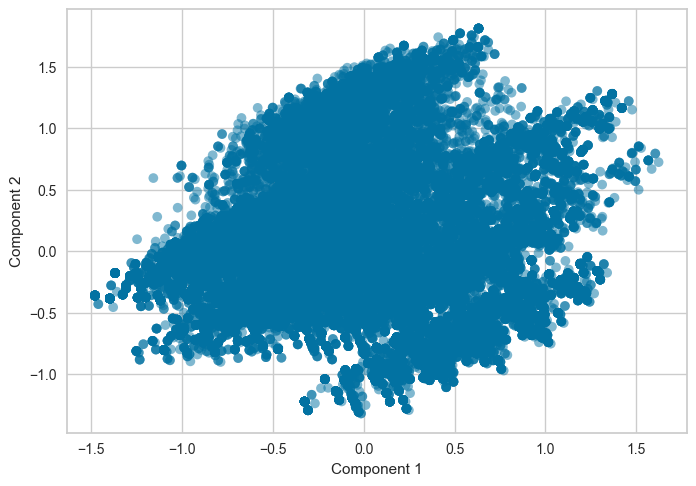

In [15]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components = 2)
pca2.fit(data_modeling)
data_pca2 = pca2.transform(data_modeling)
print(data_pca2.shape)
# Scatter plot of the two Principal Components
plt.scatter(data_pca2[:, 0], data_pca2[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2');

The two main components visualization shows that there seems to exist 2 clusters with one specially large that could be divided into more.

In [16]:
# Fit the PCA algorithm to data 
pca = PCA().fit(data_modeling)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(data_modeling.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.088697,0.088697
1,2,0.080571,0.169268
2,3,0.075673,0.244941
3,4,0.072932,0.317874
4,5,0.067184,0.385058
5,6,0.065355,0.450413
6,7,0.062501,0.512914
7,8,0.059271,0.572185
8,9,0.057268,0.629454
9,10,0.054492,0.683946


Text(0.5, 1.0, 'Explained variance by components')

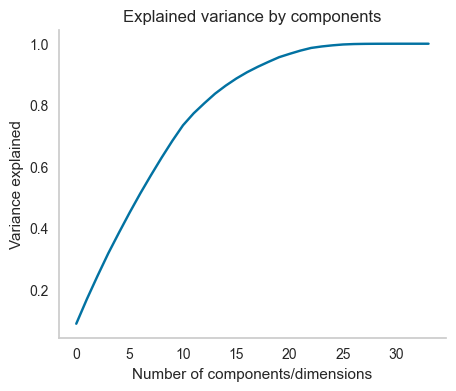

In [17]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
ax.grid(False)

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes')
plt.title('Explained variance by components')

With 23 components, it is possible to explain 99% of the variance.

<hr>
<a class="anchor" id="modeling">
    
# 4. Modeling
    
</a>

<a class="anchor" id="kmeans">
    
## 4.1. K-means 
    
    
</a>

In [18]:
# Apply the dimension reduction to the dataset (for 23 components)
# We decided the number of components based on the results of the clusters and the amount of variance explained
pca_reduced = PCA(n_components = 23)
pca_reduced.fit(data_modeling)
data_pca_reduced = pca_reduced.transform(data_modeling) 
print(data_pca_reduced.shape)

(72476, 23)


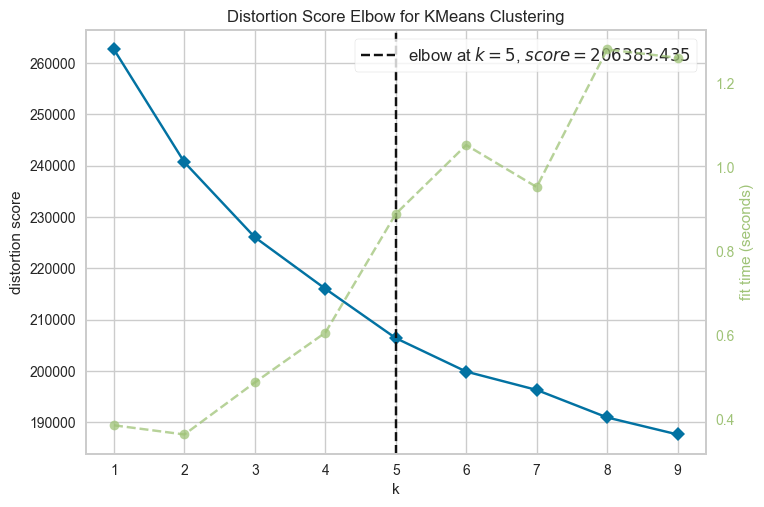

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,10), random_state=123)
visualizer.fit(data_pca_reduced)
visualizer.show() 

We decided against using clustering algorithms like DBSCAN and mean-shift clustering since the clusters would have an unpredictable format along with average values that might not serve as good indicators.

In [21]:
sil = []
for k in range(2, 11):
  km= KMeans(n_clusters = k, random_state=123).fit(data_pca_reduced)
  sil.append(silhouette_score(data_pca_reduced, km.labels_, metric='euclidean'))

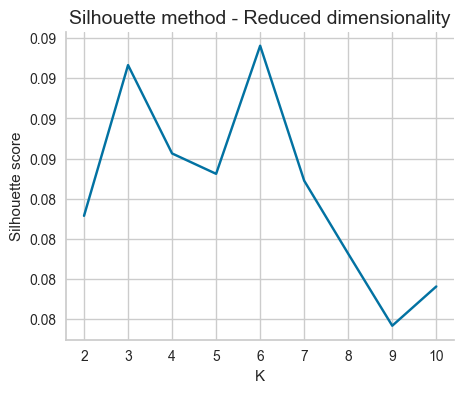

In [22]:
# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 11), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize);

We have decided on k=3 considering the elbow method with the distortion score, the value using the silhouette method and the results obtained below.

In [23]:
# Apply the K-Means for K=3
K=3
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(data_pca_reduced)
y_kmeans = kmeans.predict(data_pca_reduced)

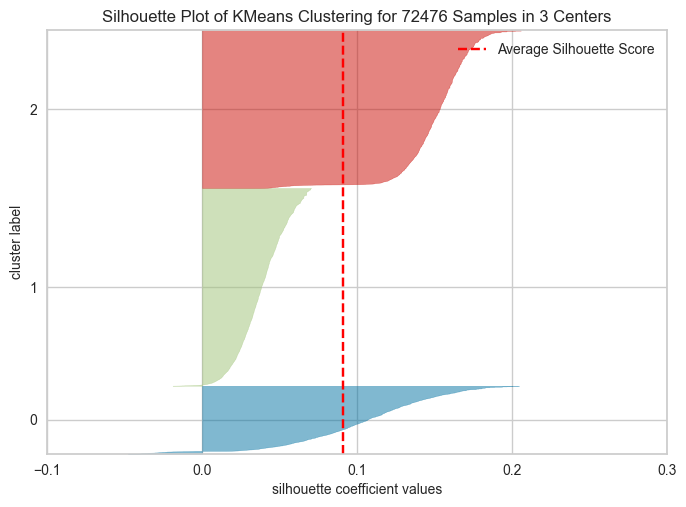

<Figure size 800x550 with 0 Axes>

In [25]:
# Count observations per cluster
freqByCluster = data_modeling.groupby(y_kmeans).size()

# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_pca_reduced)
visualizer.show()

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.despine()

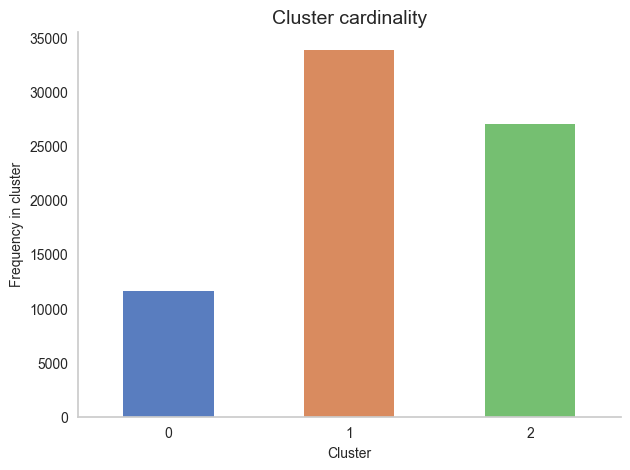

In [27]:
# Plot clusters cardinality 

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey',width=0.5, palette='muted')
ax.grid(False)

sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

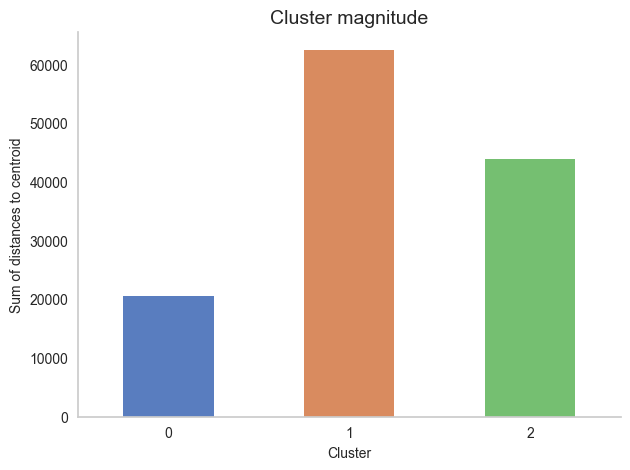

In [28]:
# Plot clusters magnitude

# Compute Magnitude
data_modeling['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = data_modeling['distanceToCentroid'].groupby(y_kmeans).sum()
data_modeling = data_modeling.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, width=0.5,color='grey', palette='muted')
ax.grid(False)

sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

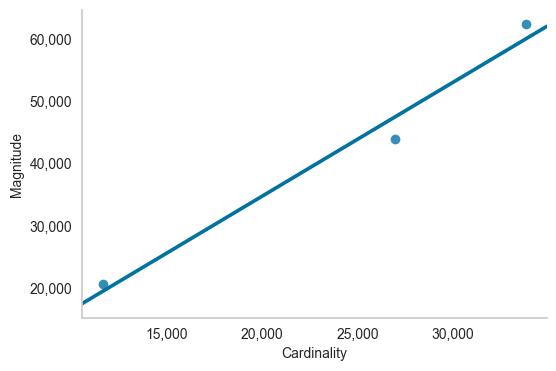

In [29]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)
ax.grid(False)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cardinality is correlated to magnitude, therefore no major anomalies seems to exist in clusters.

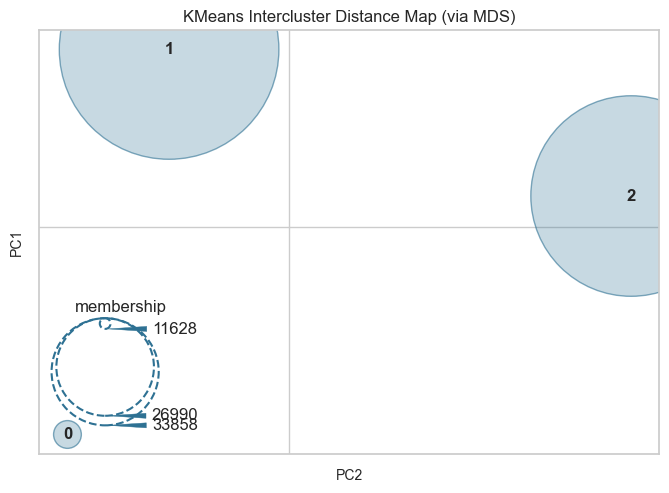

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [30]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(data_pca_reduced)
visualizer.show()

Circles represent the clusters (0 to 2). Even at two dimensions, it is possible to see that although the two components only represent around 17% of the variance, the clusters are very distanced from each other.

In [31]:
# Create a dataframe with the weights per component
weightsDF = pd.DataFrame(pca.components_,columns=data_modeling.columns)
weightsDF

,RoomNights,SRHighFloor,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,DEU,ESP,FRA,GBR,...,AverageLeadTime 6+,BookingsCheckedIn 2-6,BookingsCheckedIn 6+,BookingsCanceled 1-3,BookingsCanceled 3+,BookingsNoShowed 1,BookingsNoShowed 1+,TotalRevenue>Q3,TotalRevenue Q1-Q2,TotalRevenue Q2-Q3
0,0.001600,1.334947e-02,6.666290e-03,1.461280e-01,-8.220822e-02,1.831814e-02,-0.262540,-0.037971,-0.175588,-1.118845e-01,...,-1.713714e-01,3.821433e-02,9.580227e-04,7.764649e-04,7.460875e-05,1.863568e-04,6.374416e-05,2.538114e-01,-2.385734e-01,3.993321e-02
1,0.000605,-1.240013e-02,4.838777e-03,-4.270857e-01,2.565008e-02,-7.023989e-02,0.025641,0.055323,0.112273,3.789339e-02,...,-8.440488e-02,5.586822e-02,5.386095e-03,2.861867e-03,3.230206e-04,9.694538e-04,2.645097e-04,1.964909e-01,-1.301396e-01,-1.437553e-01
2,0.000852,4.796850e-04,2.314152e-03,-6.933969e-02,-3.235038e-02,3.729401e-02,-0.110725,0.002728,-0.025440,-4.729355e-02,...,-6.375308e-02,1.967157e-02,1.978053e-03,1.030122e-03,2.894419e-05,3.184522e-04,5.063195e-05,1.744139e-01,-9.370291e-02,-1.107078e-01
3,-0.001463,-2.638108e-02,-7.310168e-03,-5.135949e-01,2.535278e-01,-6.606692e-02,0.025223,-0.046044,-0.246773,-7.785764e-02,...,1.337597e-01,4.209460e-03,-1.900289e-03,-3.119305e-04,-3.131762e-04,7.506744e-05,-1.523643e-04,-1.046953e-01,3.652063e-01,-2.805295e-01
4,-0.001680,-1.210011e-02,-1.914568e-03,-2.966128e-01,8.005255e-02,-4.183682e-02,-0.009379,-0.001951,-0.074101,-1.200009e-02,...,-1.919972e-02,-1.672280e-02,-3.039664e-03,-1.040460e-03,-3.588542e-04,-4.923553e-04,-2.201776e-04,-4.940693e-01,-2.633016e-01,7.308995e-01
5,-0.003125,4.944341e-03,1.324360e-02,2.488258e-01,-2.021502e-01,-5.724397e-02,-0.172725,0.025524,0.044362,-2.230474e-02,...,-1.550653e-01,-1.794751e-02,-3.306827e-04,2.653074e-04,5.222098e-05,-3.246200e-04,-2.367337e-05,-4.290143e-01,4.052236e-01,-6.813277e-02
6,-0.001564,-5.881582e-03,-3.983348e-03,-1.007055e-01,-2.017511e-02,-1.487111e-02,-0.040158,0.000439,-0.025365,-3.250630e-02,...,-1.209247e-01,-2.060722e-02,-1.542340e-03,-6.567032e-04,1.935922e-05,-1.816706e-04,-6.508633e-06,-2.496081e-01,3.580316e-01,-8.097617e-02
7,0.000875,-7.675298e-03,1.479747e-03,1.296383e-01,-7.787010e-02,-6.288999e-02,-0.030050,-0.015914,-0.018305,-6.407217e-02,...,-2.438258e-02,2.798731e-02,3.211109e-03,1.900118e-03,3.918905e-04,8.337112e-04,3.135346e-04,7.450967e-02,-2.203665e-01,4.111478e-02
8,0.000041,-1.855504e-02,-8.049803e-03,-3.456060e-01,1.956681e-01,-2.277320e-02,-0.037658,0.016767,0.070987,-5.576548e-02,...,-1.920147e-01,-3.464115e-02,-1.583913e-03,-1.306377e-03,-2.070579e-04,-2.356442e-04,-8.391578e-05,2.286454e-02,-3.440918e-02,1.189250e-02
9,0.000531,1.577047e-03,1.721661e-02,-1.680902e-01,1.093095e-01,-1.319026e-02,-0.049368,-0.024575,0.121068,4.037152e-02,...,-2.357499e-01,-1.530376e-02,-9.881019e-04,-1.203514e-03,-3.062764e-04,-2.023778e-04,-1.809793e-04,1.196651e-01,-6.020426e-02,-5.858666e-02


In [32]:
# Study the weights of component 15
comp = abs(weightsDF.iloc[14])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

SRTwinBed                0.734635
GBR                      0.312698
SRKingSizeBed            0.304185
PRT                      0.298654
AverageLeadTime 6+       0.294804
SRQuietRoom              0.225409
DaysSinceCreation 3+     0.085809
AverageLeadTime 3-6      0.079119
Direct                   0.071907
SRHighFloor              0.061734
TravelAgent/Operator     0.060350
Age 30-39                0.056565
TotalRevenue>Q3          0.054788
Other                    0.053478
DEU                      0.050603
DaysSinceCreation 1-2    0.033562
ESP                      0.032895
DaysSinceCreation 2-3    0.027047
Age 40-49                0.026972
Age>=60                  0.018936
Age<20                   0.017886
TotalRevenue Q2-Q3       0.017141
FRA                      0.015977
GDSSystems               0.010661
TotalRevenue Q1-Q2       0.010614
Age 50-59                0.006845
BookingsCheckedIn 2-6    0.005941
BookingsCheckedIn 6+     0.002957
SRCrib                   0.001845
BookingsCancel

In [33]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(data_modeling[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2
SRTwinBed,0.075507,0.161350,0.164468
GBR,0.097265,0.197501,0.000000
SRKingSizeBed,0.186361,0.356873,0.421489
PRT,0.199690,0.138283,0.000000
AverageLeadTime 6+,0.074561,0.194902,0.130308
SRQuietRoom,0.036120,0.090082,0.105891
DaysSinceCreation 3+,0.160991,0.214071,0.174361
AverageLeadTime 3-6,0.169763,0.227893,0.259059
Direct,0.853887,0.000000,0.000000
SRHighFloor,0.041968,0.040818,0.042275


### Interpret clusters results

In [34]:
data_imp_kmeans = pd.concat([data_imp, pd.DataFrame(y_kmeans,index = data_imp.index)], axis=1).rename(columns={0:"Cluster"})

In [35]:
# To better interpret
data_imp_kmeans['Other'] = (data_imp_kmeans['DEU'] == 0) & (data_imp_kmeans['ESP'] == 0) & (data_imp_kmeans['FRA'] == 0) & (data_imp_kmeans['GBR'] == 0) & (data_imp_kmeans['PRT'] == 0)
data_imp_kmeans['Other'] = data_imp_kmeans['Other'].astype(int)
data_imp_kmeans['Corporate'] = (data_imp_kmeans['GDSSystems'] == 0) & (data_imp_kmeans['TravelAgent/Operator'] == 0) & (data_imp_kmeans['Direct'] == 0)
data_imp_kmeans['Corporate'] = data_imp_kmeans['Corporate'].astype(int)
data_imp_kmeans['Age 20-29'] = (data_imp_kmeans['Age<20'] == 0) & (data_imp_kmeans['Age 30-39'] == 0) & (data_imp_kmeans['Age 40-49'] == 0) & (data_imp_kmeans['Age 50-59'] == 0) & (data_imp_kmeans['Age>=60'] == 0)
data_imp_kmeans['Age 20-29'] = data_imp_kmeans['Age 20-29'].astype(int)
data_imp_kmeans['TotalRevenue<Q1'] = (data_imp_kmeans['TotalRevenue Q1-Q2'] == 0) & (data_imp_kmeans['TotalRevenue Q2-Q3'] == 0) & (data_imp_kmeans['TotalRevenue>Q3'] == 0)
data_imp_kmeans['TotalRevenue<Q1'] = data_imp_kmeans['TotalRevenue<Q1'].astype(int)
data_imp_kmeans['LodgingRevenue<Q1'] = (data_imp_kmeans['LodgingRevenue Q1-Q2'] == 0) & (data_imp_kmeans['LodgingRevenue Q2-Q3'] == 0) & (data_imp_kmeans['LodgingRevenue>Q3'] == 0)
data_imp_kmeans['LodgingRevenue<Q1'] = data_imp_kmeans['LodgingRevenue<Q1'].astype(int)
data_imp_kmeans['OtherRevenue<Q1'] = (data_imp_kmeans['OtherRevenue Q1-Q2'] == 0) & (data_imp_kmeans['OtherRevenue Q2-Q3'] == 0) & (data_imp_kmeans['OtherRevenue>Q3'] == 0)
data_imp_kmeans['OtherRevenue<Q1'] = data_imp_kmeans['OtherRevenue<Q1'].astype(int)
data_imp_kmeans['TotalRevenue<Q1'] = (data_imp_kmeans['TotalRevenue Q1-Q2'] == 0) & (data_imp_kmeans['TotalRevenue Q2-Q3'] == 0) & (data_imp_kmeans['TotalRevenue>Q3'] == 0)
data_imp_kmeans['TotalRevenue<Q1'] = data_imp_kmeans['TotalRevenue<Q1'].astype(int)
data_imp_kmeans['AverageLeadTime 0-3'] = (data_imp_kmeans['AverageLeadTime 3-6'] == 0) & (data_imp_kmeans['AverageLeadTime 6+'] == 0) 
data_imp_kmeans['AverageLeadTime 0-3'] = data_imp_kmeans['AverageLeadTime 0-3'].astype(int)
data_imp_kmeans['BookingsCheckedIn 1'] = (data_imp_kmeans['BookingsCheckedIn 2-6'] == 0) & (data_imp_kmeans['BookingsCheckedIn 6+'] == 0) 
data_imp_kmeans['BookingsCheckedIn 1'] = data_imp_kmeans['BookingsCheckedIn 1'].astype(int)
data_imp_kmeans['BookingsCanceled 0'] = (data_imp_kmeans['BookingsCanceled 1-3'] == 0) & (data_imp_kmeans['BookingsCanceled 3+'] == 0) 
data_imp_kmeans['BookingsCanceled 0'] = data_imp_kmeans['BookingsCanceled 0'].astype(int)
data_imp_kmeans['BookingsNoShowed 0'] = (data_imp_kmeans['BookingsNoShowed 1'] == 0) & (data_imp_kmeans['BookingsNoShowed 1+'] == 0) 
data_imp_kmeans['BookingsNoShowed 0'] = data_imp_kmeans['BookingsNoShowed 0'].astype(int)
data_imp_kmeans['DaysSinceCreation 0-1'] = (data_imp_kmeans['DaysSinceCreation 1-2'] == 0) & (data_imp_kmeans['DaysSinceCreation 2-3'] == 0) & (data_imp_kmeans['DaysSinceCreation 3+'] == 0) 
data_imp_kmeans['DaysSinceCreation 0-1'] = data_imp_kmeans['DaysSinceCreation 0-1'].astype(int)
non_metric_features=['SRHighFloor','SRCrib','SRKingSizeBed','SRTwinBed','SRQuietRoom','DEU','ESP','FRA','GBR','PRT',
'Other','Direct','GDSSystems','TravelAgent/Operator','Corporate','Age<20','Age 20-29','Age 30-39','Age 40-49','Age 50-59',
'Age>=60','TotalRevenue<Q1','TotalRevenue Q1-Q2','TotalRevenue Q2-Q3','TotalRevenue>Q3','AverageLeadTime 0-3',
'AverageLeadTime 3-6','AverageLeadTime 6+','BookingsCheckedIn 1','BookingsCheckedIn 2-6','BookingsCheckedIn 6+',
'BookingsCanceled 0','BookingsCanceled 1-3','BookingsCanceled 3+','BookingsNoShowed 0','BookingsNoShowed 1',
'BookingsNoShowed 1+','DaysSinceCreation 0-1','DaysSinceCreation 1-2','DaysSinceCreation 2-3', 'DaysSinceCreation 3+']

In [36]:
data_imp_kmeans.groupby('Cluster')[metric_features].mean()

,RoomNights
Cluster,
0,3.486498
1,3.186160
2,3.327566


In [37]:
data_imp_kmeans.groupby('Cluster')[non_metric_features].agg(lambda x: x.mode().iloc[0]).T

Cluster,0,1,2
SRHighFloor,0.0,0.0,0.0
SRCrib,0.0,0.0,0.0
SRKingSizeBed,0.0,0.0,0.0
SRTwinBed,0.0,0.0,0.0
SRQuietRoom,0.0,0.0,0.0
DEU,0.0,0.0,0.0
ESP,0.0,0.0,0.0
FRA,0.0,0.0,0.0
GBR,0.0,0.0,0.0
PRT,0.0,0.0,0.0


In [38]:
data_imp_kmeans.groupby('Cluster')[non_metric_features].mean().T

Cluster,0,1,2
SRHighFloor,0.041968,0.040818,0.042275
SRCrib,0.018232,0.008772,0.009448
SRKingSizeBed,0.186361,0.356873,0.421489
SRTwinBed,0.075507,0.161350,0.164468
SRQuietRoom,0.036120,0.090082,0.105891
DEU,0.076281,0.275947,0.000000
ESP,0.080753,0.100774,0.000000
FRA,0.129601,0.287495,0.000000
GBR,0.097265,0.197501,0.000000
PRT,0.199690,0.138283,0.000000


Now, using the removed variables:

In [39]:
data_imp_kmeans.groupby('Cluster')[metric_features+['PersonsNights']].mean()

,RoomNights,PersonsNights
Cluster,,
0,3.486498,6.570519
1,3.186160,6.315996
2,3.327566,6.643164


In [40]:
data_imp_kmeans.groupby('Cluster')[non_metric_features+['LodgingRevenue<Q1','LodgingRevenue Q1-Q2','LodgingRevenue Q2-Q3',
'LodgingRevenue>Q3','OtherRevenue<Q1','OtherRevenue Q1-Q2','OtherRevenue Q2-Q3','OtherRevenue>Q3']].mean().T

Cluster,0,1,2
SRHighFloor,0.041968,0.040818,0.042275
SRCrib,0.018232,0.008772,0.009448
SRKingSizeBed,0.186361,0.356873,0.421489
SRTwinBed,0.075507,0.161350,0.164468
SRQuietRoom,0.036120,0.090082,0.105891
DEU,0.076281,0.275947,0.000000
ESP,0.080753,0.100774,0.000000
FRA,0.129601,0.287495,0.000000
GBR,0.097265,0.197501,0.000000
PRT,0.199690,0.138283,0.000000


**Main Insights**
<br>
<br>
**Cluster 0**
<br>
- Clusters with the least amount of customers (16%)
- Consumers are distributed among the various nationalities
- They have as main distribution channels direct (85%) and corporate (11%)
- Most of the customers are above 30 years old (around 89%), and, compared to the other clusters, they have a smaller proportion of people above 60 and a higher proportion between 40-49
- They have an asymmetric pattern when it comes to total revenues. It contains a bigger proportion of the worst 25% clients and the top 25%.
- In terms of average lead time, it tends to be smaller compared to the other clusters, where 76% makes their bookings 0-3 months ahead.
- This is the segment with our most loyal customers, where around 13% has done more than 1 check-in
- More cancelations (0.7%) and no-shows (0.3%) were also made compared to the other clusters
- Consumers tend to be more recent when compared to the other clusters. Around 59% had their profile created in the last 2 years, with 28% the last year.
- Usually ask more for a crib (2%) and less for a king size bed (19%), twin bed (8%) and quiet room (4%) compared to the other clusters
- Has a slightly higher number of Room/Nights (3.5)

**Cluster 1**
<br>
- Cluster with the biggest amount of customers (47%)
- All customers are either portuguese, french, spanish, german or from Great Britain
- They have as main distribution channel Travel Agent (99%)
- Most of the customers are also above 30 years old (88%) but, compared to the other clusters, they a slightly higher proportion of people between 50-59 and above 60
- When it comes to revenues, they tend to be slightly worse customers since they have a 26% proportion of the worst 25% and a 21% proportion of the top 25%
- In terms of average lead time, it tends to be higher compared to the other clusters, where 57% makes their bookings 0-3 months ahead, 23% 3-6 months and 19% 6 months and above
- Compared to the other clusters, they have the highest proportion of customers that have only checked-in once (97%)
- Cancelations and no-shows were very rare (0.04% and 0.006%, respectively)
- Customers tend to be older in terms of when the profile was created when compared to the other clusters. Around 48% had their profile created in the last 2 years, with 22% the last year.
- Around 4% asks for a high floor, 0.9% for a crib, 36% for a king size bed, 16% for a twin bed and 9% for a quiet room (values very similar to the next cluster - 2)
- Has a slightly lower number of Room/Nights (3.2)

**Cluster 2**
- Cluster with 37% of the customers of the hotel
- None of the customers are from the 5 most present nationalities in the hotel: Germany, Spain, France, Great Britain and Portugal
- They have as main distribution channel Travel Agent (98%)
- Most of the customers are again above 30 years old (88%)
- When it comes to revenues, they tend to be slightly better customers since they have a 22% proportion of the worst 25% and a 26% proportion of the top 25%
- In terms of average lead time, 61% makes their bookings 0-3 months ahead, 26% 3-6 months and 13% 6 months and above
- Around 3% have done more than 1 check-in
- Cancelations and no-shows were also very rare (0.03% and 0.007%, respectively)
- Around 54% had their profile created in the last 2 years, with 25% the last year
- Around the same values when it comes to high floor, crib, king size bed, twin bed and quiet room to the cluster 1
- Has a value of Room/Nights of 3.3
- In general, considering most variables, cluster 2 tends to have values in the "middle" of the proportions of cluster 0 and 1, but tend to the side of cluster 1

<a class="anchor" id="hckmeans">
    
## 4.2. K-means and Hierarchical Clustering
    
    
</a>

In [41]:
data_pca_reduced=pd.DataFrame(data_pca_reduced,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'
,'PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23'])

In [42]:
k_means = KMeans(n_clusters=20,random_state=123)  #using 20 clusters
hkm_labels = k_means.fit_predict(data_pca_reduced)
data_hkm = pd.concat((data_pca_reduced, pd.DataFrame(hkm_labels,index = data_pca_reduced.index).rename(columns = {0:'Initial Cluster'})), axis = 1)

In [43]:
hkm_centroids=data_hkm.groupby('Initial Cluster').mean()

In [44]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  #return sum of sum of squares of each df variable

def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    sst = get_ss(df)  #get total sum of squares
    
    r2 = []  #where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  #concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  #compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  #save the R2 of the given cluster solution
        
    return np.array(r2)

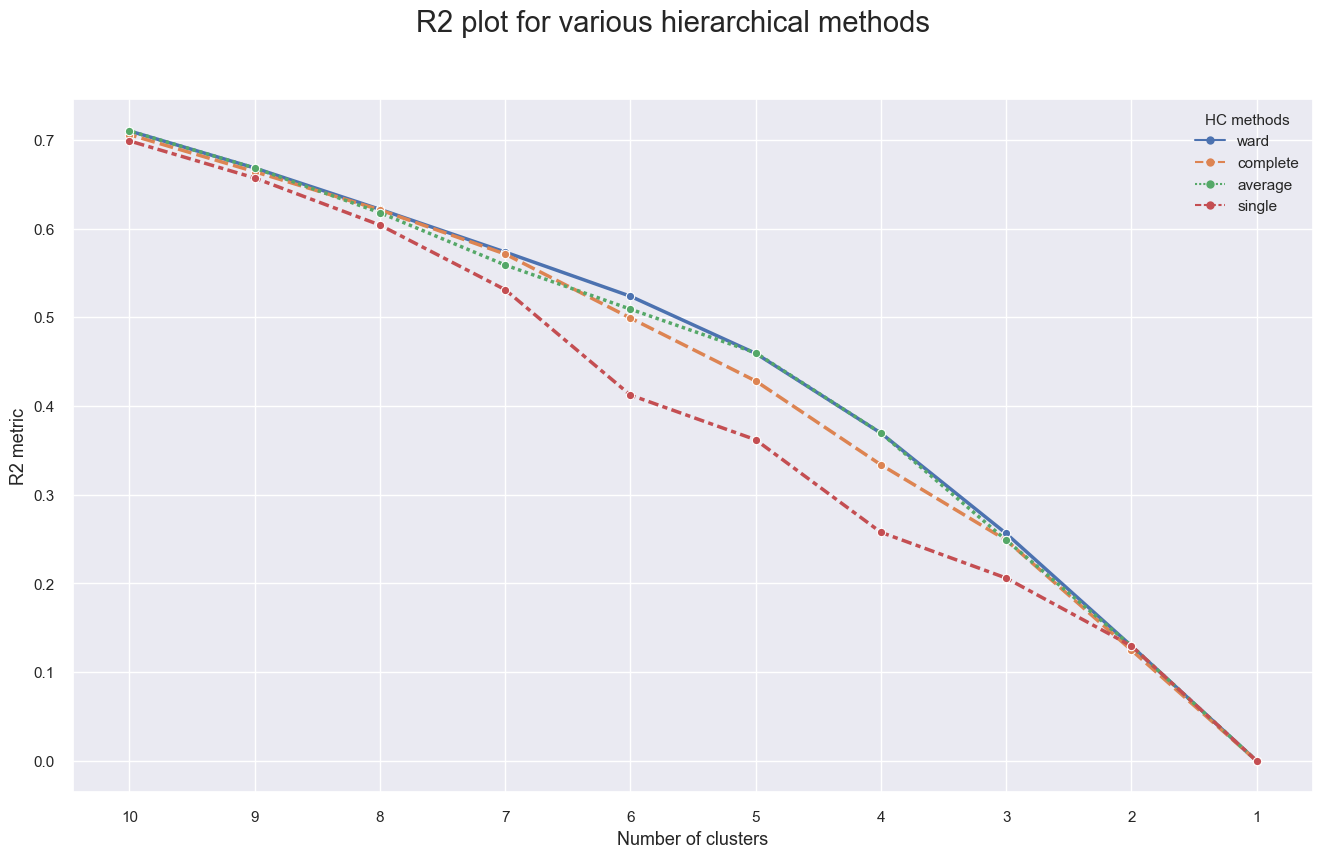

In [45]:
hc_methods = ["ward", "complete", "average", "single"]
#call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=hkm_centroids, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
#plot data
fig = plt.figure(figsize=(16,9))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

#finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  #invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [46]:
#setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance='euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(hkm_centroids)

array([11, 14, 17, 10, 13, 12,  5, 18, 19, 16,  6, 15,  7,  9,  4,  8,  3,
        1,  2,  0], dtype=int64)

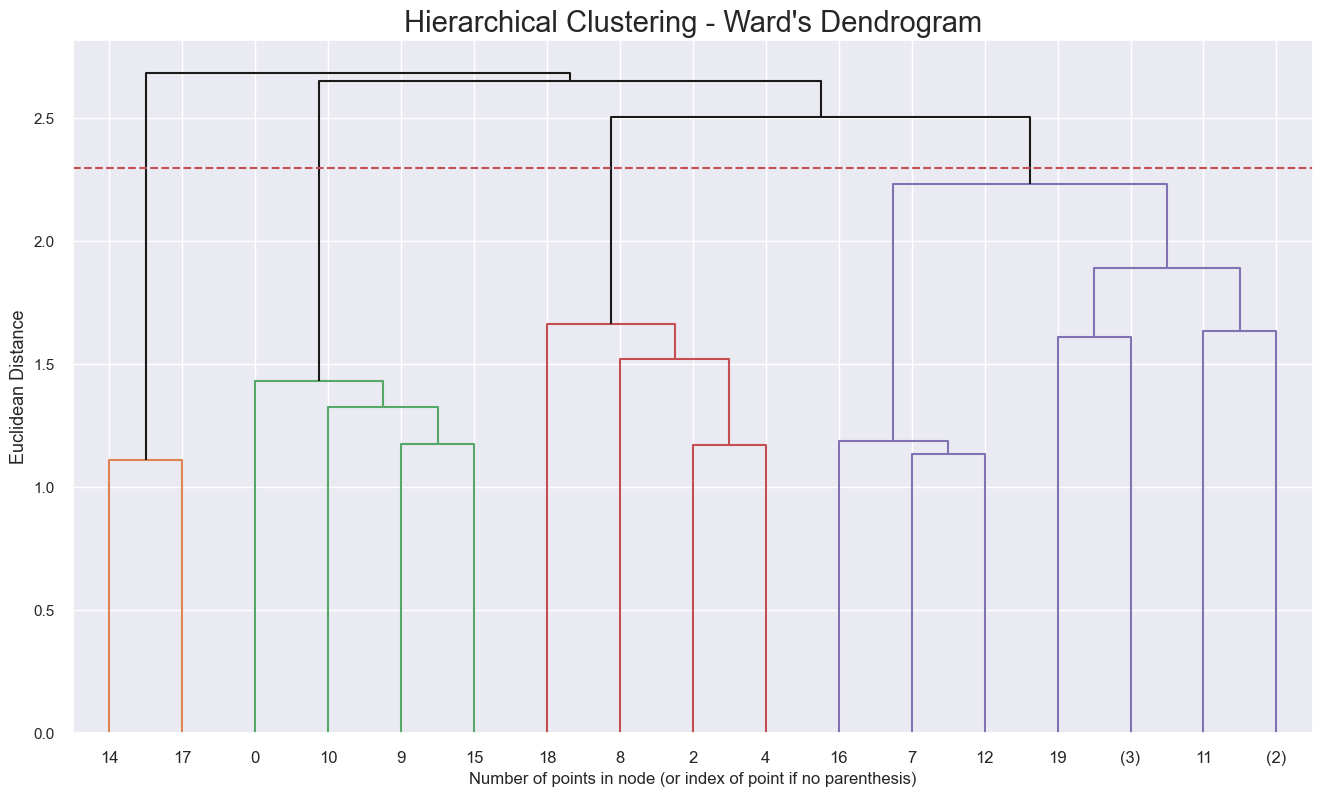

In [47]:
#create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

#hclust.children_ contains the observation ids that are being merged together
#at the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    #track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            #if this is True, then we are merging an observation
            current_count += 1  #leaf node
        else:
            #otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

#the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
#the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
#the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

#plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(16,9))
y_threshold = 2.3
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [48]:
#4 cluster solution
linkage = 'ward'
hkm = AgglomerativeClustering(linkage=linkage, affinity='euclidean', n_clusters=4)
hkm_labels = hkm.fit_predict(hkm_centroids)

In [49]:
hkm_centroids['Final Cluster'] = hkm_labels
hkm_centroids   #centroid's cluster labels

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Final Cluster
Initial Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.138827,-0.226655,0.005620,-0.589286,0.660709,-0.420089,0.535595,0.097373,0.123521,-0.260968,...,0.007416,-0.012798,0.008129,-0.008143,0.090177,0.071936,-0.010834,-0.007136,-0.027733,2
1,0.373493,-0.480887,0.083013,0.218930,0.146547,0.447848,0.222769,0.067208,-0.099722,0.601394,...,-0.039524,0.014747,-0.002347,-0.007158,-0.003977,-0.062245,0.028788,0.020085,-0.019439,0
2,0.038551,-0.756301,0.363199,0.520871,0.165844,-0.157401,-0.245271,0.011189,-0.226362,-0.060555,...,0.014703,0.004416,-0.007111,-0.015459,0.054000,-0.037316,0.004986,0.009387,0.026015,1
3,-0.397010,-0.007746,-0.103365,-0.234874,0.018297,0.225445,0.013715,-0.019490,-0.158598,0.736135,...,-0.079546,-0.194045,-0.006630,0.123686,0.012799,-0.015116,0.034241,0.010154,-0.053187,0
4,-0.772862,-0.313212,0.374003,-0.021944,0.013022,-0.245629,-0.420142,-0.165728,-0.336002,0.057722,...,-0.083550,-0.071319,0.007958,0.056743,-0.026131,0.047648,-0.020674,-0.018286,0.027349,1
5,0.563118,-0.404166,-0.630230,0.117129,0.441493,-0.098141,-0.063047,-0.245118,-0.093186,-0.049927,...,0.026262,0.018714,-0.007231,0.037546,-0.031649,0.053019,-0.021347,-0.014145,0.053628,0
6,0.694861,-0.215873,0.081858,0.155083,-0.472733,-0.394947,-0.295000,0.095981,-0.059003,0.403651,...,0.008018,-0.005788,0.002180,-0.008493,0.119293,0.066872,-0.048182,-0.026832,0.093227,0
7,-0.340644,0.390747,0.059888,-0.146385,0.018513,0.228928,-0.390080,-0.410376,0.653079,-0.195181,...,-0.120867,-0.131365,-0.009691,0.097975,0.022241,-0.023099,0.032825,0.016564,-0.049629,0
8,-0.257820,-0.354769,-0.281818,0.342983,-0.067271,0.002285,-0.247467,0.879317,0.204582,-0.053494,...,-0.038879,-0.016224,0.045752,0.089834,-0.114486,0.095459,-0.022078,-0.013862,0.029630,1


In [50]:
#mapper between initial and final clusters
cluster_mapper = hkm_centroids['Final Cluster'].to_dict()

#mapping the final clusters on the centroids to the observations
data_hkm['Final Cluster'] = data_hkm.apply(
    lambda row: cluster_mapper[(row['Initial Cluster'])], axis=1)

data_hkm.drop('Initial Cluster', axis=1, inplace=True)

In [51]:
data_hkm.groupby('Final Cluster').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Final Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.095964,-0.075692,-0.092529,-0.072429,-0.022153,0.173946,-0.151955,-0.124159,0.134203,0.134621,...,-0.010822,-0.012439,0.013325,0.004740,-0.011891,0.012300,-0.001580,0.003311,0.002857,0.006393
1,-0.474535,-0.394334,-0.006959,0.391871,0.024341,-0.210585,-0.307916,0.212446,-0.116345,-0.058627,...,-0.057118,0.000666,-0.019681,-0.010316,0.019843,-0.026786,0.004519,0.000626,-0.001435,0.017996
2,-0.056089,-0.090839,0.046783,-0.272009,-0.094784,-0.388056,0.640617,-0.014900,0.085718,-0.215597,...,-0.025723,-0.004286,-0.014035,-0.006529,0.007051,0.004558,0.008825,0.009219,0.002252,-0.034325
3,0.324745,0.899786,0.280079,0.158180,0.184658,0.179540,0.032801,0.207637,-0.465262,-0.112091,...,0.147625,0.050633,-0.004037,0.004904,0.008502,-0.017737,-0.012415,-0.025935,-0.011819,0.002746


In [52]:
data_imp_hk = pd.concat((data_imp, pd.DataFrame(data_hkm['Final Cluster'],index = data_imp.index).rename(columns = {0:'Cluster'})), axis = 1)

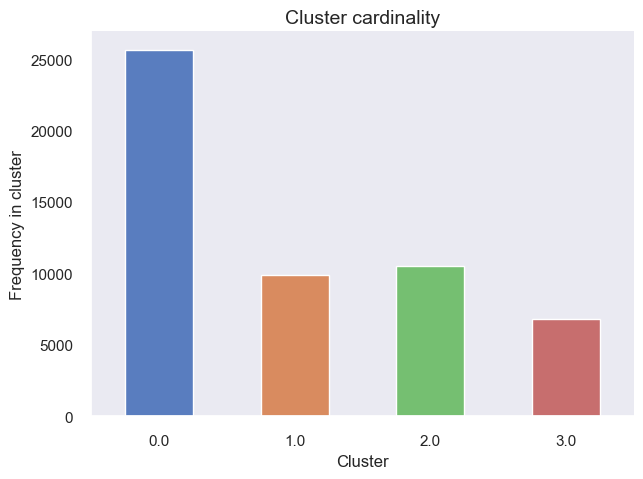

In [53]:
# Plot clusters cardinality 


# Count observations per cluster
freqByCluster = data_modeling.groupby(data_imp_hk['Final Cluster']).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=data_imp_hk['Final Cluster'], width=0.5,color='grey', palette='muted')
ax.grid(False)

sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

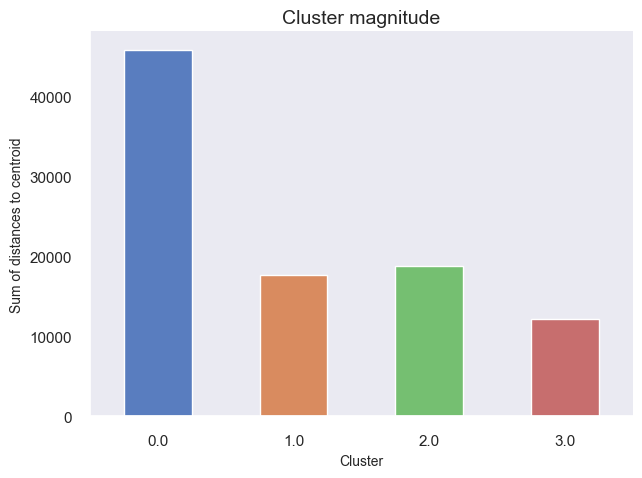

In [54]:
# Plot clusters magnitude

# Compute Magnitude
data_modeling['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = data_modeling['distanceToCentroid'].groupby(data_imp_hk['Final Cluster']).sum()
data_modeling = data_modeling.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, width=0.5,color='grey', palette='muted')
ax.grid(False)

sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

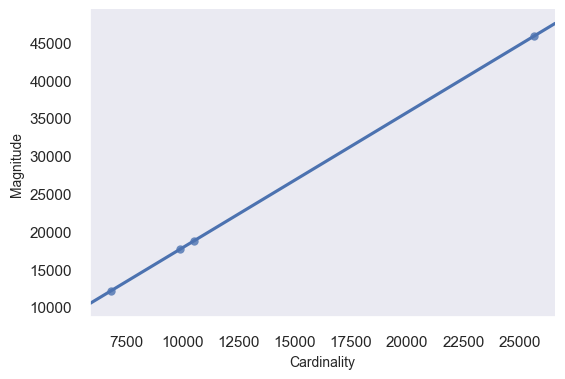

In [55]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)
ax.grid(False)

sns.despine()
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

### Interpret clusters results

In [56]:
# To better interpret
data_imp_hk['Other'] = (data_imp_hk['DEU'] == 0) & (data_imp_hk['ESP'] == 0) & (data_imp_hk['FRA'] == 0) & (data_imp_hk['GBR'] == 0) & (data_imp_hk['PRT'] == 0)
data_imp_hk['Other'] = data_imp_hk['Other'].astype(int)
data_imp_hk['Corporate'] = (data_imp_hk['GDSSystems'] == 0) & (data_imp_hk['TravelAgent/Operator'] == 0) & (data_imp_hk['Direct'] == 0)
data_imp_hk['Corporate'] = data_imp_hk['Corporate'].astype(int)
data_imp_hk['Age 20-29'] = (data_imp_hk['Age<20'] == 0) & (data_imp_hk['Age 30-39'] == 0) & (data_imp_hk['Age 40-49'] == 0) & (data_imp_hk['Age 50-59'] == 0) & (data_imp_hk['Age>=60'] == 0)
data_imp_hk['Age 20-29'] = data_imp_hk['Age 20-29'].astype(int)
data_imp_hk['TotalRevenue<Q1'] = (data_imp_hk['TotalRevenue Q1-Q2'] == 0) & (data_imp_hk['TotalRevenue Q2-Q3'] == 0) & (data_imp_hk['TotalRevenue>Q3'] == 0)
data_imp_hk['TotalRevenue<Q1'] = data_imp_hk['TotalRevenue<Q1'].astype(int)
data_imp_hk['AverageLeadTime 0-3'] = (data_imp_hk['AverageLeadTime 3-6'] == 0) & (data_imp_hk['AverageLeadTime 6+'] == 0) 
data_imp_hk['AverageLeadTime 0-3'] = data_imp_hk['AverageLeadTime 0-3'].astype(int)
data_imp_hk['BookingsCheckedIn 1'] = (data_imp_hk['BookingsCheckedIn 2-6'] == 0) & (data_imp_hk['BookingsCheckedIn 6+'] == 0) 
data_imp_hk['BookingsCheckedIn 1'] = data_imp_hk['BookingsCheckedIn 1'].astype(int)
data_imp_hk['BookingsCanceled 0'] = (data_imp_hk['BookingsCanceled 1-3'] == 0) & (data_imp_hk['BookingsCanceled 3+'] == 0) 
data_imp_hk['BookingsCanceled 0'] = data_imp_hk['BookingsCanceled 0'].astype(int)
data_imp_hk['BookingsNoShowed 0'] = (data_imp_hk['BookingsNoShowed 1'] == 0) & (data_imp_hk['BookingsNoShowed 1+'] == 0) 
data_imp_hk['BookingsNoShowed 0'] = data_imp_hk['BookingsNoShowed 0'].astype(int)
data_imp_hk['DaysSinceCreation 0-1'] = (data_imp_hk['DaysSinceCreation 1-2'] == 0) & (data_imp_hk['DaysSinceCreation 2-3'] == 0) & (data_imp_hk['DaysSinceCreation 3+'] == 0) 
data_imp_hk['DaysSinceCreation 0-1'] = data_imp_hk['DaysSinceCreation 0-1'].astype(int)

In [57]:
data_imp_hk.groupby('Final Cluster')[metric_features].mean()

,RoomNights
Final Cluster,
0.0,3.299758
1.0,3.310568
2.0,3.238354
3.0,3.310426


In [58]:
data_imp_hk.groupby('Final Cluster')[non_metric_features].agg(lambda x: x.mode().iloc[0]).T

Final Cluster,0.0,1.0,2.0,3.0
SRHighFloor,0.0,0.0,0.0,0.0
SRCrib,0.0,0.0,0.0,0.0
SRKingSizeBed,0.0,0.0,0.0,0.0
SRTwinBed,0.0,0.0,0.0,0.0
SRQuietRoom,0.0,0.0,0.0,0.0
DEU,0.0,0.0,0.0,0.0
ESP,0.0,0.0,0.0,0.0
FRA,0.0,0.0,0.0,0.0
GBR,0.0,0.0,0.0,0.0
PRT,0.0,0.0,0.0,0.0


In [59]:
data_imp_hk.groupby('Final Cluster')[non_metric_features].mean().T

Final Cluster,0.0,1.0,2.0,3.0
SRHighFloor,0.046153,0.046003,0.045823,0.048752
SRCrib,0.008498,0.008714,0.010003,0.009251
SRKingSizeBed,0.345638,0.347350,0.349528,0.347137
SRTwinBed,0.140095,0.135779,0.141945,0.144493
SRQuietRoom,0.081781,0.092917,0.088311,0.092217
DEU,0.139627,0.129395,0.125274,0.126872
ESP,0.065097,0.064444,0.068400,0.062408
FRA,0.152881,0.173574,0.166333,0.158443
GBR,0.109262,0.108319,0.114699,0.113803
PRT,0.103337,0.104570,0.105078,0.097797


The solutions from this method are not good, as the interpretation does not provide insights into the customer segments.